<h2>Homework6</h2>

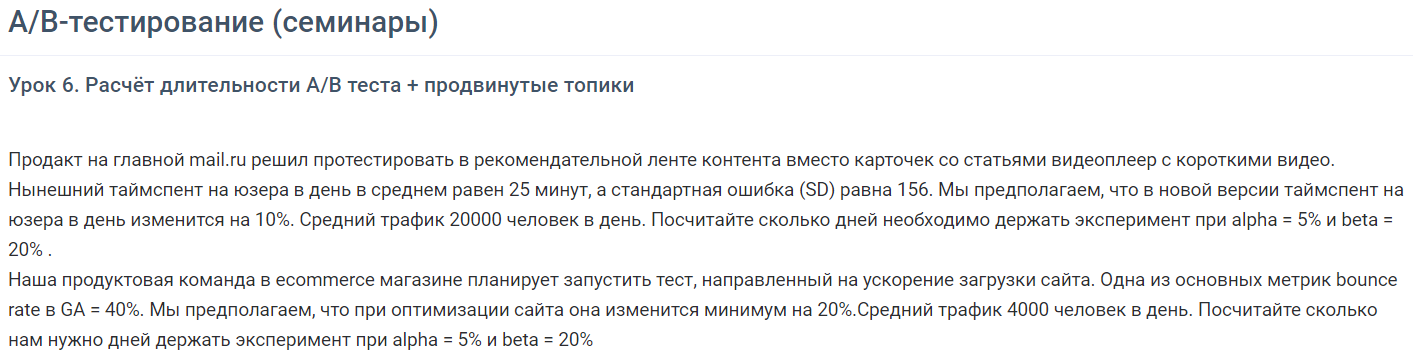

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math

<h3>Task 1</h3>
<p align = 'justify'><font size="3" color="black" face="Calibri">Продакт на главной mail.ru решил протестировать в рекомендательной ленте контента вместо карточек со статьями видеоплеер с короткими видео. Нынешний таймспент на юзера в день в среднем равен 25 минут, а стандартная ошибка (SD) равна 156. Мы предполагаем, что в новой версии таймспент на юзера в день изменится на 10%. Средний трафик 20000 человек в день. Посчитайте сколько дней необходимо держать эксперимент при alpha = 5% и beta = 20% .<p></font>

In [2]:
users_per_day_Task1 = 20000 # Трафик
timespent_per_user_A = 25 # Базовый показатель
timespent_per_user_B = timespent_per_user_A * 1.1 # Ожидаемый показатель по результатам эксперимента
SD = 156 # Стандартное отклонение
alpha = 0.05 # Уровень достоверности (α)
beta = 0.20 # Статистическая мощность (1 - β)

# Найти объем выборки можно через формулу Z-критерия: Z = (X - μ)/(SD/n**0.5)
# В данной формуле нам известны средние значения выборок (μ1 = 25, μ2 = 27.5) и cтандартное отклонение (SD = 156)
# Значение Z-критерия для известного уровня достоверности мы можем найти по таблице, по формуле или через функцию scipy.stats.norm.ppf
# Необходимо, чтобы Z-критерий удовлетворял условию достоверности (α = 0.05) и чтобы Z-критерий удовлетворял условию статистической мощности (1 - β = 0.8),
# так как подтверждение H1 будут попадать в этот диапазон.
# Таким образом, для решения задачи необходимо решить систему из двух уравнений:
# Za = (X - μ)/(SD/n**0.5) = (X - μ)/(SE)
# Zb = (X - μ)/(SD/n**0.5) = (X - μ)/(SE)

In [3]:
Z_score_A = st.norm.ppf(1 - alpha) # Определяем Z-критерий для α. Важен только "правый" хвост.
Z_score_B = st.norm.ppf(beta) # Определяем Z-критерий для β. Важен только "левый" хвост.
print(Z_score_A)
print(Z_score_B)

1.6448536269514722
-0.8416212335729142


In [5]:
# Z_score_A = (X - μA)/(SE)
# Z_score_B = (X - μB)/(SE)

# Z_score_A*SE = X - μA
# Z_score_B*SE = X - μB

# μA = X - Z_score_A*SE
# μB = X - Z_score_B*SE

# 25 = X - 1.64*SE
# 27.5 = X + 0.84*SE

In [6]:
# Для решения системы уравнений используем функцию numpy.linalg.solve
coefficients = np.array([[1, Z_score_A], [1, Z_score_B]])
constants = np.array([timespent_per_user_A, timespent_per_user_B])
sample_parametrs = np.linalg.solve(coefficients, constants)
print(sample_parametrs)

[26.65380078 -1.00543948]


In [7]:
# SE = SD/N_sample**0.5
# N_sample**0.5 = SD/SE
# N_sample = (SD/SE)**2
N_sample = (SD/sample_parametrs[1])**2
N_sample

24073.39404774922

In [8]:
expirement_duration_Task1 = math.ceil((N_sample*2)/users_per_day_Task1)

In [9]:
print(f'Эксперимент необходимо проводить {expirement_duration_Task1} дня')

Эксперимент необходимо проводить 3 дня


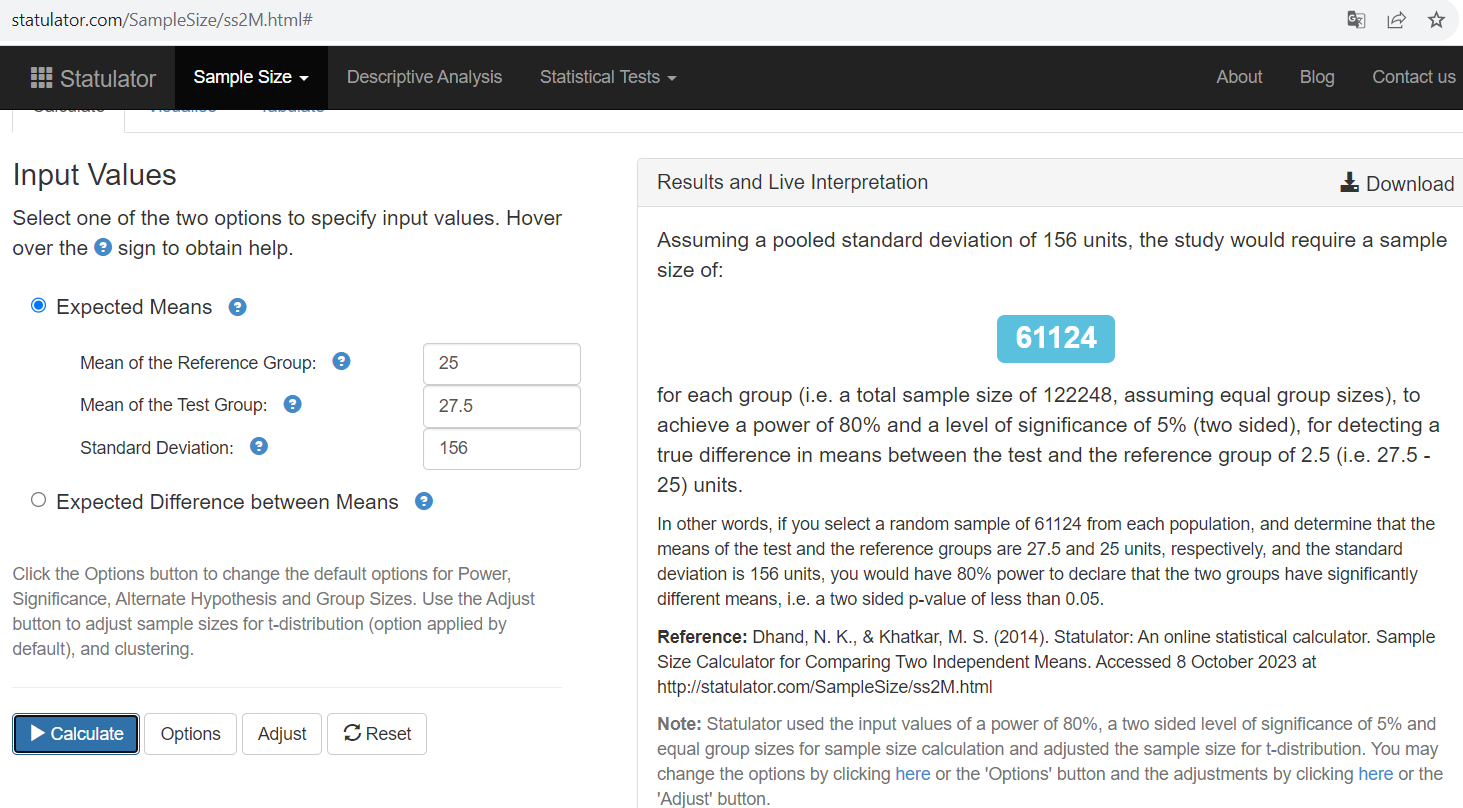

<h3>Task 2</h3>
<p align = 'justify'><font size="3" color="black" face="Calibri">Наша продуктовая команда в ecommerce магазине планирует запустить тест, направленный на ускорение загрузки сайта. Одна из основных метрик bounce rate в GA = 40%. Мы предполагаем, что при оптимизации сайта она изменится минимум на 20%.Средний трафик 4000 человек в день. Посчитайте сколько нам нужно дней держать эксперимент при alpha = 5% и beta = 20%<p></font>

In [12]:
users_per_day_Task2 = 4000 # Трафик

https://www.evanmiller.org/ab-testing/sample-size.html#!40;80;5;20;1
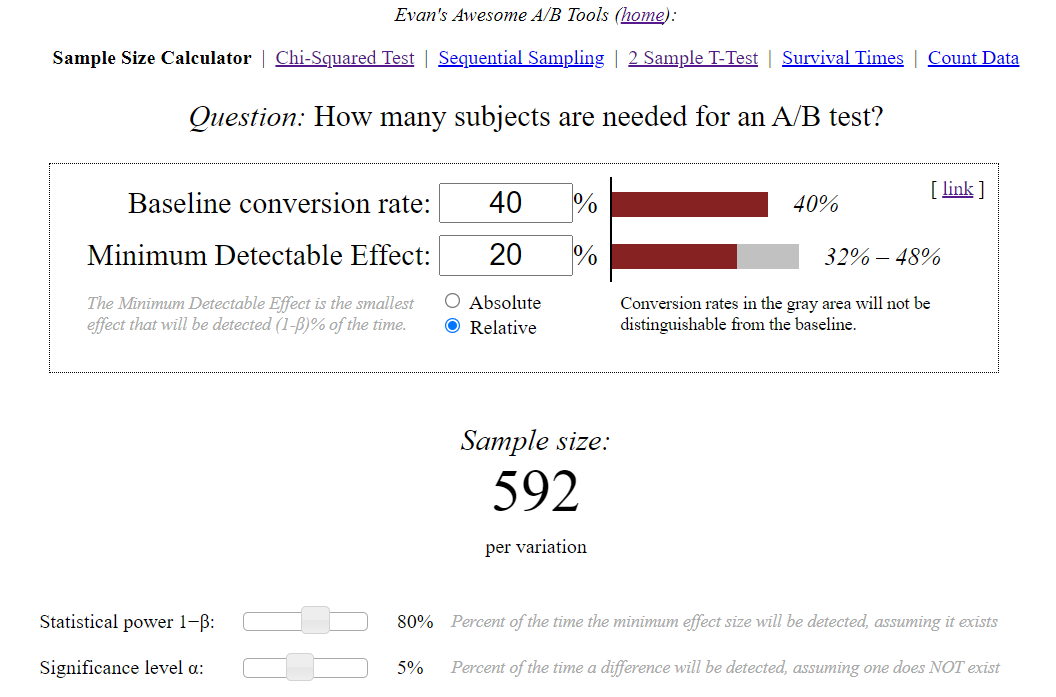

In [13]:
expirement_duration_Task2 = math.ceil((592)/users_per_day_Task2)

In [14]:
print(f'Эксперимент необходимо проводить {expirement_duration_Task2} день')

Эксперимент необходимо проводить 1 день
